In [14]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
import os
from tensorflow import keras
import random
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import optimizers

In [2]:
import numpy as np
import pandas as pd
import os
import keras

In [3]:
temperature_data_path = 'data/temperature/'
height_data_path = 'data/height/'

temperature_files = os.listdir(temperature_data_path)
height_files = os.listdir(height_data_path)

In [4]:
temperature_data = []
height_data = []

for temperature_file in temperature_files:
    file_path = temperature_data_path + temperature_file
    data = pd.read_csv(file_path)
    temperature_data.append(data)
    
for height_file in height_files:
    file_path = height_data_path + height_file
    data = pd.read_csv(file_path)
    height_data.append(data)

In [5]:
temp_data_train = np.array(temperature_data[:1200])
temp_data_val = np.array(temperature_data[1200:1600])
temp_data_test = np.array(temperature_data[1600:])

height_data_train = np.array(height_data[:1200])
height_data_val = np.array(height_data[1200:1600])
height_data_test = np.array(height_data[1600:])

In [6]:
print(temp_data_train[0].shape)

(200, 201)


In [29]:
print(temp_data_train[0][0])

[300.   300.   300.   300.   300.   300.   300.   300.   300.   300.
 300.   300.   300.   300.   300.   300.   300.   300.   300.   300.
 300.   300.   300.14 300.56 301.27 302.24 303.45 304.9  306.55 308.36
 310.32 312.38 314.51 316.67 318.81 320.91 322.92 324.8  326.54 328.08
 329.41 330.49 331.32 331.88 332.15 332.14 331.83 331.25 330.39 329.27
 327.92 326.35 324.6  322.7  320.68 318.57 316.43 314.27 312.15 310.1
 308.16 306.35 304.73 303.31 302.11 301.17 300.5  300.11 300.   300.
 300.   300.   300.   300.   300.   300.   300.   300.   300.   300.
 300.   300.   300.   300.   300.   300.   300.   300.   300.   300.
 300.   300.   300.   300.   300.   300.   300.   300.   300.   300.
 300.   300.   300.   300.   300.   300.   300.   300.   300.   300.
 300.   300.   300.   300.   300.   300.   300.   300.   300.   300.
 300.   300.   300.   300.   300.   300.   300.   300.   300.   300.
 300.   300.   300.   300.   300.   300.   300.   300.   300.   300.
 300.   300.   300.   300. 

In [64]:
epochs  = 20

In [110]:
temperature_data_new = np.array(temperature_data)
height_data_new = np.array(height_data)

In [111]:
temperature_data_new = temperature_data_new[:,0,:]

In [112]:
height_data_new = height_data_new[:,0,:]

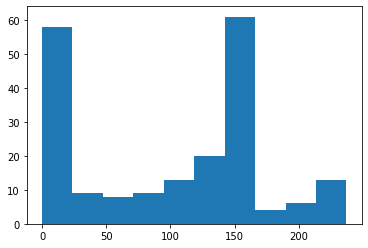

In [114]:
plt.hist(height_data_new[0])
plt.show()

In [103]:
temp_mean = temperature_data_new.mean()
temp_std = temperature_data_new.std()

height_mean = height_data_new.mean()
height_std = height_data_new.std()

In [109]:
print(height_mean, height_std)

15059.836748867678 5712181.094231742


In [104]:
temperature_data_new = (temperature_data_new - temp_mean)/temp_std
height_data_new = (height_data_new - height_mean)/height_std

In [108]:
print(height_data_new[200])

[-0.00261686 -0.00261571 -0.00261467 -0.00261372 -0.00261286 -0.00261209
 -0.00261141 -0.00261081 -0.00261029 -0.00260984 -0.00260947 -0.00260917
 -0.00260894 -0.00260877 -0.00260866 -0.00260861 -0.00260862 -0.00260868
 -0.00260879 -0.00260894 -0.00260914 -0.00260938 -0.00260965 -0.00260996
 -0.0026103  -0.00261067 -0.00261105 -0.00261147 -0.00261189 -0.00261233
 -0.00261278 -0.00261324 -0.00261369 -0.00261415 -0.0026146  -0.00261505
 -0.00261548 -0.0026159  -0.0026163  -0.00261669 -0.00261705 -0.00261739
 -0.00261769 -0.00261798 -0.00261823 -0.00261845 -0.00261864 -0.00261881
 -0.00261894 -0.00261905 -0.00261912 -0.00261917 -0.00261919 -0.0026192
 -0.00261917 -0.00261914 -0.00261909 -0.00261903 -0.00261895 -0.00261887
 -0.00261878 -0.0026187  -0.0026186  -0.00261852 -0.00261844 -0.00261837
 -0.00261831 -0.00261826 -0.00261822 -0.00261821 -0.0026182  -0.00261823
 -0.00261826 -0.00261833 -0.00261842 -0.00261854 -0.00261868 -0.00261886
 -0.00261905 -0.00261929 -0.00261955 -0.00261986 -0.

In [106]:
seed = 7
np.random.seed(seed)
X_train, X_test, Y_train, Y_test = train_test_split(temperature_data_new, height_data_new, test_size=0.1, random_state=seed)

In [107]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1,min_delta=0.01, patience=20)
lr_schedule = optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, decay_steps=1600, decay_rate=0.95)
rmsprop = optimizers.RMSprop(learning_rate=lr_schedule, momentum=0.3)

In [91]:
model = keras.models.Sequential([
        #keras.layers.Dense(100, input_shape=(200, 201), activation="relu"),   
        keras.layers.Dense(201, activation="relu"),   
        keras.layers.Dense(201, activation="relu"),
        keras.layers.Dense(201, activation=None)
])

In [92]:
model.compile(optimizer=rmsprop,loss="mse", metrics=["mse"])

In [56]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [93]:
history = model.fit(X_train, Y_train, batch_size=100, callbacks=[es], shuffle=True, epochs=epochs, validation_split=0.1)

Epoch 1/20
16/16 [==============================] - 1s 28ms/step - loss: 1.2628 - mse: 1.2628 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 1.2351 - mse: 1.2351 - val_loss: 0.0034 - val_mse: 0.0034
Epoch 3/20
16/16 [==============================] - 0s 9ms/step - loss: 1.2327 - mse: 1.2327 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 4/20
16/16 [==============================] - 0s 10ms/step - loss: 1.2320 - mse: 1.2320 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 5/20
16/16 [==============================] - 0s 11ms/step - loss: 1.2299 - mse: 1.2299 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 1.2280 - mse: 1.2280 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 7/20
16/16 [==============================] - 0s 11ms/step - loss: 1.2254 - mse: 1.2254 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 8/20
16/16 [==============================] - 0s 15ms/step - loss: 1.2222 - ms

In [94]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.014240977354347706
Test accuracy: 0.014240977354347706


In [95]:
print(X_test[0])
print('----------------------------------')
print(Y_test[0])
print('----------------------------------')
prediction = model.predict(X_test)
print(prediction[0])

[-0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791
 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.41963932 -0.42945974
 -0.37151924 -0.25072804 -0.0759245   0.14012481  0.38268926  0.63212801
  0.87174634  1.08386748  1.25179672  1.36473159  1.41285166  1.39419286
  1.30875518  1.16439495  0.96995057  0.74113471  0.49366005  0.24618538
  0.01638747 -0.17903895 -0.32536325 -0.43338791 -0.43338791 -0.43338791
 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791
 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791
 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791
 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791
 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791
 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791 -0.43338791
 -0.43142383 -0.37250129 -0.23305128 -0.01700196  0.26680827  0.60954104
  1.00039389  1.42561821  1.87048339  2.32025877  2

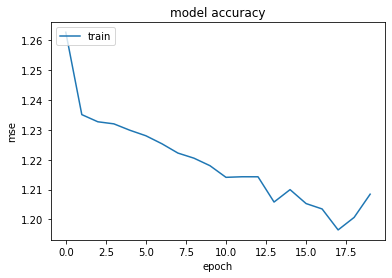

In [96]:
plt.plot(history.history['mse'])
# plt.plot(history.history['val'])
plt.title('model accuracy')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
plt.imshow(temp_data_train[0], cmap='hot', interpolation='nearest')
plt.show()

In [99]:
print(Y_test[0])

[-0.00261314 -0.0026139  -0.00261476 -0.00261572 -0.0026168  -0.002618
 -0.00261932 -0.00262077 -0.00262236 -0.0026241  -0.00262599 -0.00262803
 -0.00263026 -0.00263258 -0.0026347  -0.0026358  -0.00263533 -0.00263586
 -0.00263571 -0.00263558 -0.00263594 -0.00263576 -0.0026358  -0.00263578
 -0.00263577 -0.00263596 -0.00263544 -0.00263607 -0.00263531 -0.00263586
 -0.00263489 -0.00263241 -0.00262958 -0.00262664 -0.00262394 -0.00262131
 -0.00261889 -0.00261655 -0.00261442 -0.00261237 -0.00261053 -0.00260875
 -0.00260719 -0.0026057  -0.00260442 -0.00260321 -0.00260221 -0.00260128
 -0.00260056 -0.00259991 -0.00259947 -0.00259911 -0.00259895 -0.00259886
 -0.00259899 -0.00259919 -0.00259959 -0.00260007 -0.00260077 -0.00260153
 -0.00260251 -0.00260356 -0.00260483 -0.00260617 -0.00260772 -0.00260935
 -0.0026112  -0.00261313 -0.00261527 -0.0026175  -0.00261995 -0.00262249
 -0.00262525 -0.00262812 -0.00263113 -0.0026339  -0.00263573 -0.00263525
 -0.00263582 -0.00263546 -0.00263585 -0.00263566 -0.0

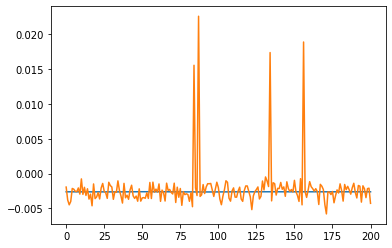

In [98]:
# plt.plot(X_test[0])
plt.plot(Y_test[0])
plt.plot(prediction[0])
plt.show()

TypeError: Invalid shape (201,) for image data

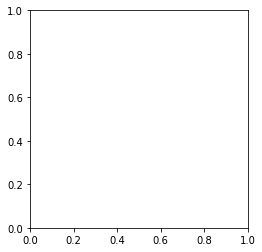

In [60]:
plt.imshow(X_test[0], cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
plt.imshow(height_data_train[0], cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
plt.imshow(temp_data_train[200], cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
plt.imshow(height_data_train[200], cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
epochs = 20

In [ ]:
rsfwalters
